# Linear Regression预测房价

In [7]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
from sklearn.linear_model import LinearRegression # sk-learn库Linear Regression模型
from sklearn.model_selection import train_test_split # sk-learn库训练与测试
from sklearn import metrics # 生成各项测试指标库
import matplotlib.pyplot as plt # 画图常用库
import math #数学库

从../input/kc_house_data.csv文件中读入数据

In [8]:
data = pd.read_csv("../input/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [9]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

获得自变量X和因变量Y

In [48]:
X = data[['bedrooms','bathrooms','sqft_living','floors']]
Y = data['price']
print(X)

       bedrooms  bathrooms  sqft_living  floors
0             3       1.00         1180     1.0
1             3       2.25         2570     2.0
2             2       1.00          770     1.0
3             4       3.00         1960     1.0
4             3       2.00         1680     1.0
5             4       4.50         5420     1.0
6             3       2.25         1715     2.0
7             3       1.50         1060     1.0
8             3       1.00         1780     1.0
9             3       2.50         1890     2.0
10            3       2.50         3560     1.0
11            2       1.00         1160     1.0
12            3       1.00         1430     1.5
13            3       1.75         1370     1.0
14            5       2.00         1810     1.5
15            4       3.00         2950     2.0
16            3       2.00         1890     2.0
17            4       1.00         1600     1.5
18            2       1.00         1200     1.0
19            3       1.00         1250 

获得2:1的训练：测试数据比例

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=1/3, random_state = 0)
print(xtrain.head())
print(ytrain.head())

       bedrooms  bathrooms  sqft_living  floors
828           3       1.50         1260     1.0
17642         2       1.00         1320     1.5
4062          3       1.00          920     1.0
5787          2       1.75         1350     1.0
19516         3       2.25         1820     1.0
828      465750.0
17642    575000.0
4062     212500.0
5787     455000.0
19516    480000.0
Name: price, dtype: float64


In [18]:
xtrain = np.asmatrix(xtrain)
xtest = np.asmatrix(xtest)
ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)
print(xtrain[:6])
print(ytrain[:6])

[[3.00e+00 1.50e+00 1.26e+03 1.00e+00]
 [2.00e+00 1.00e+00 1.32e+03 1.50e+00]
 [3.00e+00 1.00e+00 9.20e+02 1.00e+00]
 [2.00e+00 1.75e+00 1.35e+03 1.00e+00]
 [3.00e+00 2.25e+00 1.82e+03 1.00e+00]
 [4.00e+00 2.25e+00 2.77e+03 2.00e+00]]
[465750. 575000. 212500. 455000. 480000. 825000.]


观察房价和生活面积的关系

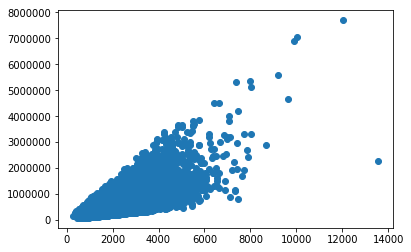

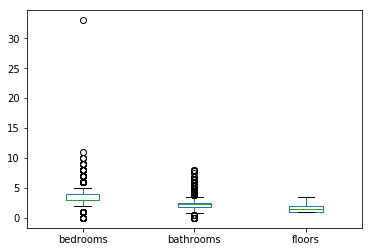

In [54]:
plt.scatter(X['sqft_living'],Y)
plt.show()

X[['bedrooms','bathrooms','floors']].plot.box()

观察生活面积分布

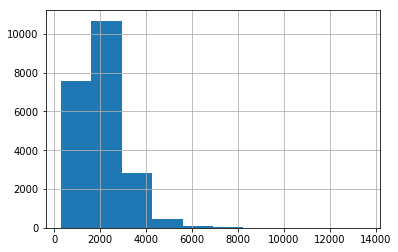

In [20]:
X['sqft_living'].hist()
plt.show()

用xtrain和ytrain训练模型

In [34]:
model = LinearRegression()
model.fit(xtrain, ytrain)
model
print(np.shape(model.coef_))
print(np.shape(np.transpose(model.coef_)))
print(np.shape(X.columns[:6]))
print(list(zip(np.transpose(model.coef_),X.columns[:6])))

(4,)
(4,)
(4,)
[(-51118.88197258235, 'bedrooms'), (4146.343826186947, 'bathrooms'), (300.225555249355, 'sqft_living'), (5226.700983164915, 'floors')]


In [39]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,bedrooms,-51118.881973
1,bathrooms,4146.343826
2,sqft_living,300.225555
3,floors,5226.700983


In [36]:
model.intercept_

71317.92892233568

In [37]:
#一个房子，3个卧室，2个卫生间，2500sqft，2层楼，预测房价
model.predict([[3,2,2500,2]])

array([687271.26074668])

训练集上的均方差MSE

In [40]:
pred = model.predict(xtrain)
((pred - ytrain)*(pred - ytrain)).sum() / len(ytrain)

64954234066.3795

平均相对误差

In [41]:
(abs(pred-ytrain)/ytrain).sum()/len(ytrain)

0.3505482583370653

训练集合上的MSE

In [42]:
predtest = model.predict(xtest)
((predtest-ytest)*(predtest-ytest)).sum() / len(ytest)

69651448893.86034

In [43]:
(abs(predtest-ytest)/ytest).sum() / len(ytest)

0.34624369015230444